# STAT207 Mini-Project #1 - Loan Dataset Exploratory Data Analysis


Alan Yom

In [67]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Introduction

### Research Question

How does the relationship between the applicant's income and loan amount change based on the applicants loan status?

### Research Motivation

By understanding how the relationship between the applicant's income and loan amount change based on the applicants loan status can help automate the process of approving loans to increase th productivity and maximize profits. Exploring the relationships based on loan status can uncover potential paterns in lending which can help identify whether specific income groups have historically been approved or denied. Furthermore, these findings can help the insurance companies refine their lending models, improving the speed in which loan applicants are responded to, and contributing to more profitable lending practices.

## 2. Dataset Discussion

### Dataset Display

There are 614 rows and 13 columns.

In [68]:
df = pd.read_csv('Loan.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [116]:
df.shape

(614, 13)

### Dataset Source

I found this loan dataset on Kaggle and downloaded the csv file on Feb 22.

https://www.kaggle.com/datasets/ninzaami/loan-predication

### Original Dataset Information

Each row of this dataset represents an application submitted for a loan, which includes gender, marital status, education, income, employment, loan amount, etc. This dataset consists of insurance company loan data across various industries and while it does not directly answer how the data was collected, it was most likely from insurance or financial institution's loan application records. This dataset does not include all possible types of observations, most notably the applicant's names to maintain anonymity. Some other obervations that might be left out includes the applicant's occupation, loan purpose, interest rate on the loan and banking history of the applicants. These limitations of this dataset could negatively impact the research question as some of these observations such as loan purpose can be crucial for making assumptions of whether the loan was approved or not. The three variables chosen for this are loan amount, applicant income, and loan status. Firstly, the loan amount represents the amount the applicant intends to borrow. The applicant income states how much the applicant makes monthly, and the loan status indicates whether the loan was approved or not.

## 3. Dataset Cleaning

### Missing Value Detection and Cleaning

This dataset had several explicit missing rows as seen in the NA value sum. There were no implicit missing values as demonstrated in the sorted values of the numerical variables and the list of unique values of the categorical variable. 22 missing rows have been dropped which can be seen in the the difference between the unfiltered dataset shape and the filtered dataset shape. Some pros of using the isna function and sum function given by pandas is that is is easily able to detect the explicit values of the dataset and drop them with the dropna function. A con of this method is that it is unable to detect implicit missing values that is not recognized by pandas. A pro of using the np.unique function is that is is able to list all of the unique values of the variable, and the sort_value function allows you to find any values that is not numerical. A con of these methods is that is can take a while to manually go through each value of the dataset.

In [72]:
df_filtered = df[['ApplicantIncome', 'LoanAmount', 'Loan_Status']]
df_filtered.head(5)

,ApplicantIncome,LoanAmount,Loan_Status
0,5849,NaN,Y
1,4583,128.0,N
2,3000,66.0,Y
3,2583,120.0,Y
4,6000,141.0,Y


In [113]:
df_filtered.describe()

,ApplicantIncome,LoanAmount
count,592.000000,592.000000
mean,5404.304054,146.412162
std,6164.073003,85.587325
min,150.000000,9.000000
25%,2887.250000,100.000000
50%,3806.000000,128.000000
75%,5754.500000,168.000000
max,81000.000000,700.000000


In [73]:
df_filtered.isna().sum()

ApplicantIncome     0
LoanAmount         22
Loan_Status         0
dtype: int64

In [75]:
df_filtered.dropna(inplace=True)
df_filtered.shape

/var/folders/dd/_ztt_jls2k3c4svmnfr9gm0c0000gn/T/ipykernel_69847/3315684342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


(592, 3)

In [77]:
df_filtered['ApplicantIncome'].sort_values()

216      150
468      210
600      416
500      645
188      674
       ...  
185    39147
155    39999
171    51763
333    63337
409    81000
Name: ApplicantIncome, Length: 592, dtype: int64

In [78]:
df_filtered['LoanAmount'].sort_values()

568      9.0
14      17.0
94      25.0
133     25.0
555     26.0
       ...  
369    570.0
561    600.0
155    600.0
130    650.0
171    700.0
Name: LoanAmount, Length: 592, dtype: float64

In [79]:
np.unique(df_filtered['Loan_Status'])

array(['N', 'Y'], dtype=object)

### Sample Size Cleaning

This grouping shows that there are at least 10 rows for each categorical label.

In [80]:
group_counts = df_filtered.groupby(['Loan_Status']).count()

In [81]:
group_counts

,ApplicantIncome,LoanAmount
Loan_Status,,
N,181,181
Y,411,411


### Outlier Cleaning

Based on the applicant income distribution and the applicant loan amount distribution, there were many outliers for both categories. Starting with the income distribution, the pros of dropping some of these outliers is that it can help generalize the research to the majority of the applicants and will prevent the results from being skewed due to a couple of outliers. The cons of removing these outliers is that it can cause the research to be overgeneralized and not accurately capture the entirety of the dataset. Similarly, for the loan amount distribution, by dropping outliers, this can help shift the focus on the majority of the applicants but will also cause some applicants that hold value to be overlooked.

For this research, we are dropping only the extreme outliers. Since we want to find the relationship between loan amount and applicant income as the loan status changes, by only removing some of the extreme caases that cause unnecessary skewing while maintaining the natural trends of the dataset. In total, 7 outliers were dropped by limiting applicant's monthly income to be less than 30,000. 

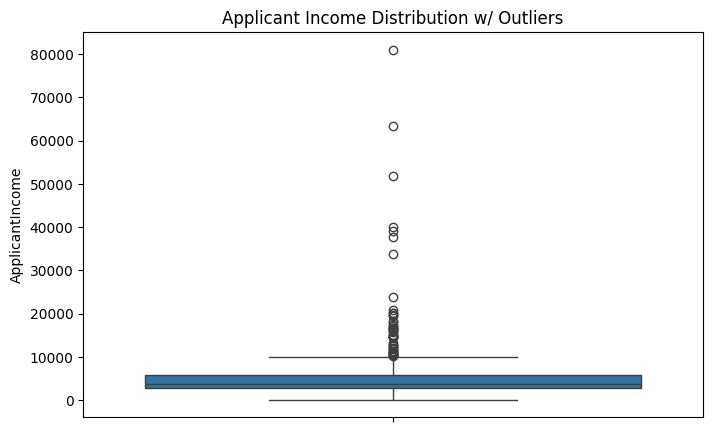

In [124]:
plt.figure(figsize=(8,5))
sns.boxplot(df_filtered['ApplicantIncome'])
plt.title('Applicant Income Distribution w/ Outliers')
plt.show()

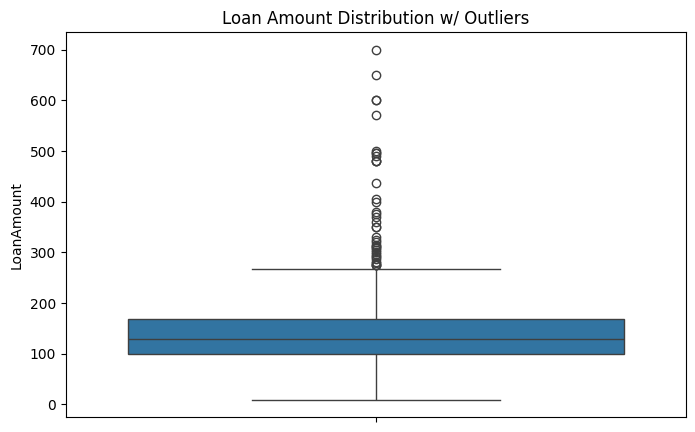

In [125]:
plt.figure(figsize=(8,5))
sns.boxplot(df_filtered['LoanAmount'])
plt.title('Loan Amount Distribution w/ Outliers')
plt.show()

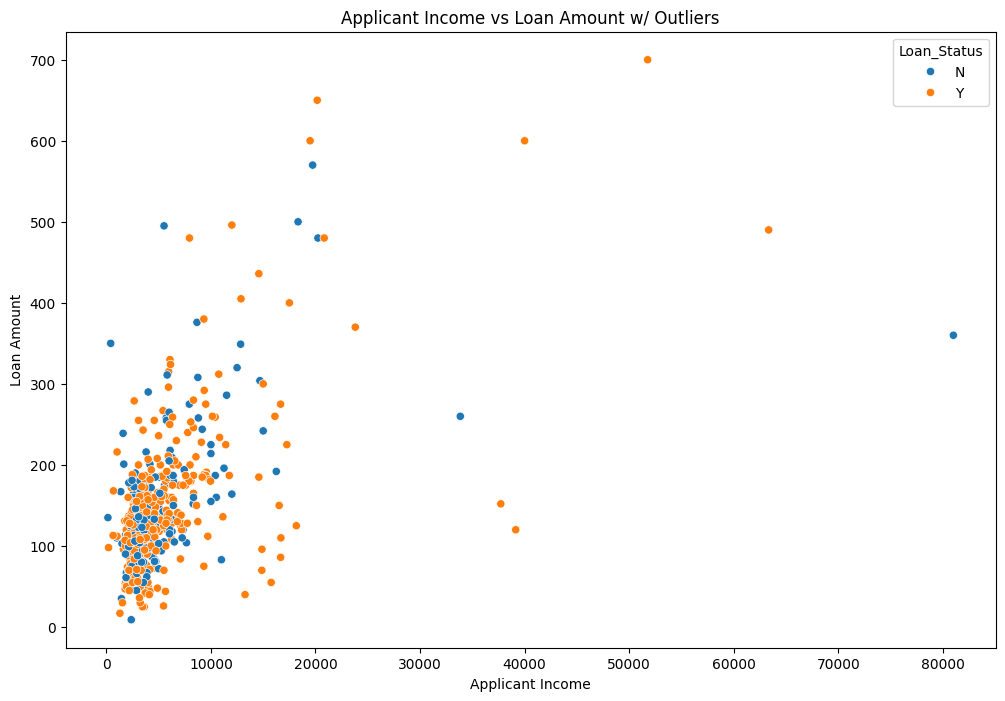

In [137]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df_filtered)
plt.title('Applicant Income vs Loan Amount w/ Outliers')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [142]:
df_dropped = df_filtered[df_filtered['ApplicantIncome'] < 30000]
df_dropped.shape

(585, 3)

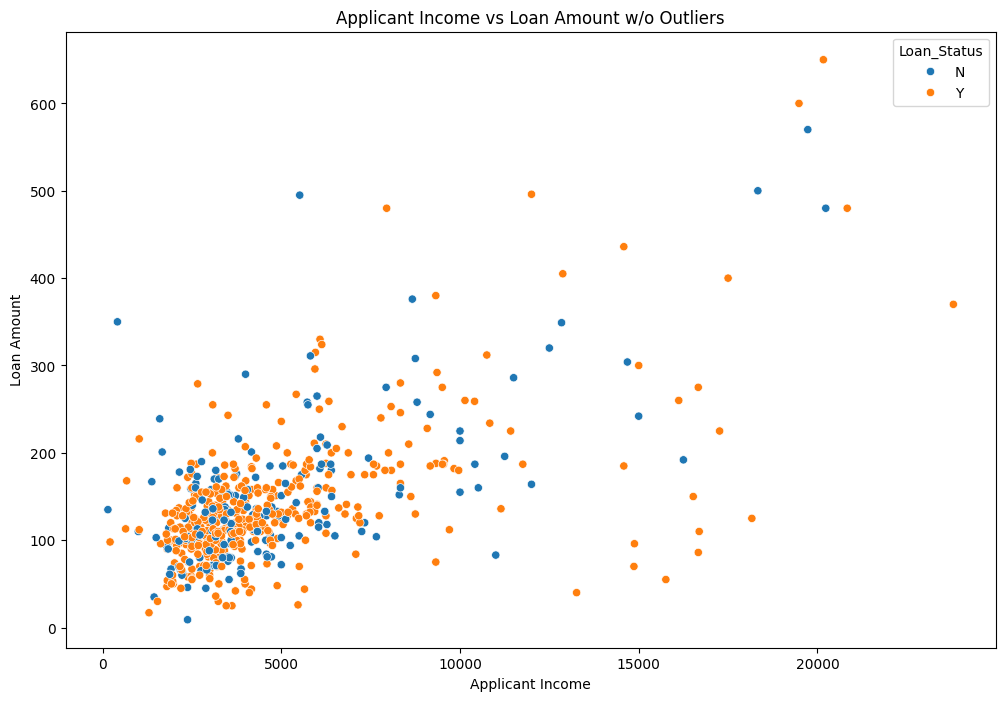

In [141]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df_dropped)
plt.title('Applicant Income vs Loan Amount w/o Outliers')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

### Other Data Cleaning

There was also a strong skew in the loan amount, so a total of 4 outliers were removed. Extremely high loan amounts can misrepresent the entire dataset as they can be representing very rare cases such as large personal projects which does not apply for the general applicant pool. Removing these cases ensures that the analysis reflects the typical applicant's experience, which may be more relevant for understanding patterns in regular lending practices.

<Figure size 1200x800 with 0 Axes>

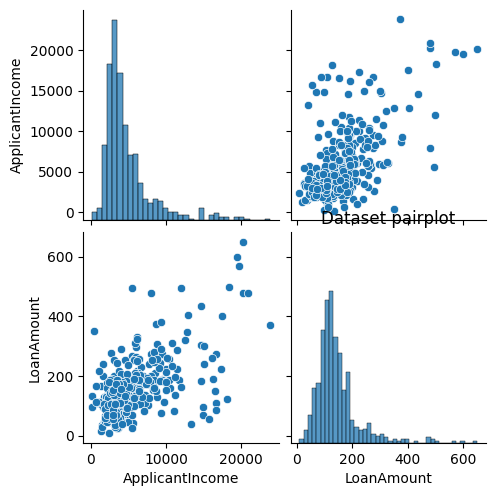

In [151]:
plt.figure(figsize=(12,8))
sns.pairplot(df_dropped)
plt.title('Dataset pairplot')
plt.show()

In [158]:
df_dropped = df_dropped[df_dropped['LoanAmount'] < 500]

In [159]:
df_dropped.shape

(581, 3)

## 4. <u>Research Question</u>: How does the Relationship between loan amount and application income Change based on Different Values of loan status in the Dataset?

### Visualization

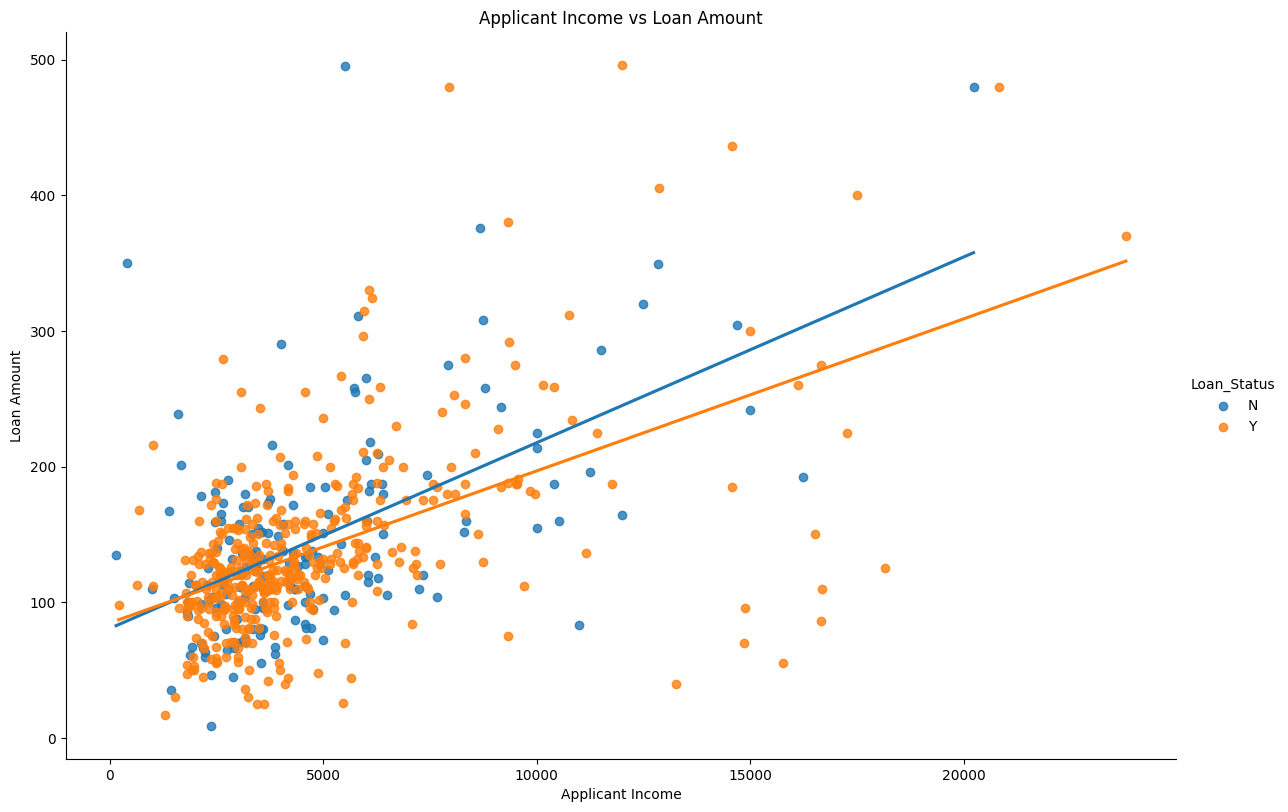

In [160]:
sns.lmplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', ci=False, data=df_dropped, height=8, aspect=1.5)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

### Summary Statistic

1. Direction changes:
The relationship between applicant income and loan amount are positive for both accepted and rejected loan status. As the general applicant income increases, the loan amount tends to increase as well.
2. Shape changes:
The shape of the relationship between applicant income and loan amount are both non-linear for both accepted and rejected loan status as the correlation table shows no significant linearity.
3. Strength changes:
The strength of the relationship between applicant income and loan amount is higher for the rejected loan status than it is for accepted loan status.
4. Outlier differences:
There are many for both types of room types. There are particularly more outliers for higher loan rejection as the loan amount increases, and more outliers for loan acceptance when the applicant income is higher.
5. Slope changes:
The slope of the relationship between applicant income and loan amount for rejected loan status is steeper than it is for accepted loan status.

In [162]:
df_dropped.groupby(['Loan_Status']).corr()

ApplicantIncome  LoanAmount
Loan_Status                                             
N           ApplicantIncome         1.000000    0.559465
            LoanAmount              0.559465    1.000000
Y           ApplicantIncome         1.000000    0.542454
            LoanAmount              0.542454    1.000000

In [161]:
df_dropped.describe()

,ApplicantIncome,LoanAmount
count,581.000000,581.000000
mean,4775.944923,140.574871
std,3224.108157,70.173332
min,150.000000,9.000000
25%,2875.000000,100.000000
50%,3750.000000,126.000000
75%,5667.000000,164.000000
max,23803.000000,496.000000


### Research Question Answer

The relationship between an applicant's income and loan amount varies based on loan status in several key ways. The direction of the relationship remains positive for both accepted and rejected loans, meaning that as an applicant’s income increases, the loan amount they apply for also tends to increase. However, while this relationship is not linear for both groups, the strength of the relationship is greater for rejected loans than for accepted ones. This suggests that income plays a more significant role in determining loan amounts among rejected applicants, possibly indicating stricter lending criteria for higher loan requests. Additionally, the slope of the relationship is steeper for rejected loans, meaning that the income needed for larger loans increases significantly. This is proved further by the correlation table which shows that there is not a significant linear correlation between applicant income and loan amount for both accepted and rejected loans, indicating a non-linear growth as the loan amount increases. Lastly, the presence of outliers in both categories suggests variability in lending decisions, potentially influenced by other factors such as credit history or purpose of loan. These findings indicate that a higher income has a better chance of recieving loan approval, and while income and loan amount are closely linked, approval decisions for larger loans are likely influenced by additional factors beyond income alone. 

## 5. Conclusion

### Summarization

The relationship between an applicant’s income and loan amount varies depending on loan status, revealing key insights into lending patterns. While the relationship remains positive for both accepted and rejected loans, its non-linear nature and greater strength among rejected applicants suggest that income plays a more significant role in loan denials, possibly due to stricter criteria for larger loans. The steeper slope for rejected loans further indicates that higher-income applicants may still face difficulties securing loans at larger amounts. The presence of numerous outliers, particularly among rejected loans with high amounts and accepted loans with high income, highlights variability in lending decisions influenced by factors beyond income alone. These findings can help financial institutions refine their loan approval models by ensuring that lending criteria are applied consistently across different income levels. Additionally, they can aid company executives in identifying potential disparities in loan approvals and implementing regulations that can be used to speed up the loan approval process.

### Shortcomings/Caveats

While this analysis provides valuable insights into how income and loan amount interact based on loan status, several limitations must be considered. One of the limitations to this research is the exclusion of critical variables such as banking history in addition to data that is usually done manually such as what the applicant plans to spend the loan on. Another limitation is the reliance on correlation and scatterplots to analyze relationships. While these methods help establish trends, they do not provide causation, meaning that other unobserved factors could be influencing the relationship between income, loan amount, and loan status. Since there are other variables that come into play, while there is a relationship between loan amount and applicant income, they alone cannot determine whether an applicant's loan should be approved.

### Future Work

One potential idea for future work is to incorporate additional variables such as credit history, debt-to-income ratio, etc to better understand the factors influencing loan approval. By including these variables, future research could develop a more comprehensive model that explains not only the relationship between income and loan amount but also how other financial indicators impact loan decisions. This could be done using a multicoliniar model to find the correlation across many variables.

